In [3]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

### Modeling Random Walk 4.1
* 1000 students, each time we flip a coin they randomly take a step to the left or right.  We need to assess where they would end up after 4, 8, 16 flips

In [4]:
num_people = 1000
num_steps = 16

In [5]:
steps_4 = np.random.uniform(-1,1,(num_people,4))
steps_8 = np.random.uniform(-1,1,(num_people,8))
steps_16 = np.random.uniform(-1,1,(num_people,16))

steps_mult = np.hstack((np.mean(steps_4, axis=1).reshape(-1,1),
                        np.mean(steps_8, axis=1).reshape(-1,1),
                        np.mean(steps_16, axis=1).reshape(-1,1)))

steps_mult.shape

(1000, 3)

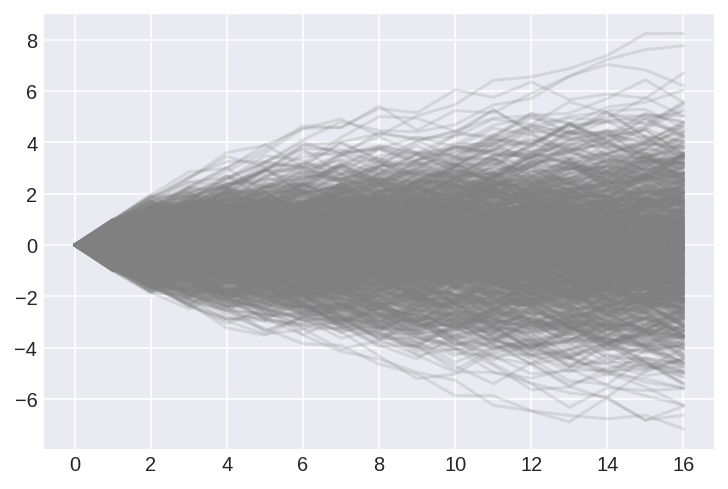

In [6]:
# Plotting the movement across different steps

# Notion of 16 steps
steps_t16 = np.random.uniform(-1,1,(num_people,num_steps))
steps_t16 = np.hstack((np.zeros((num_people,1)), steps_t16))
cum_steps = np.cumsum(steps_t16, axis=1)

plt.plot(cum_steps.T, alpha=0.2, color='grey'); # Neat !!!! a semicolon get rids ot messages like ...lines.2D ...

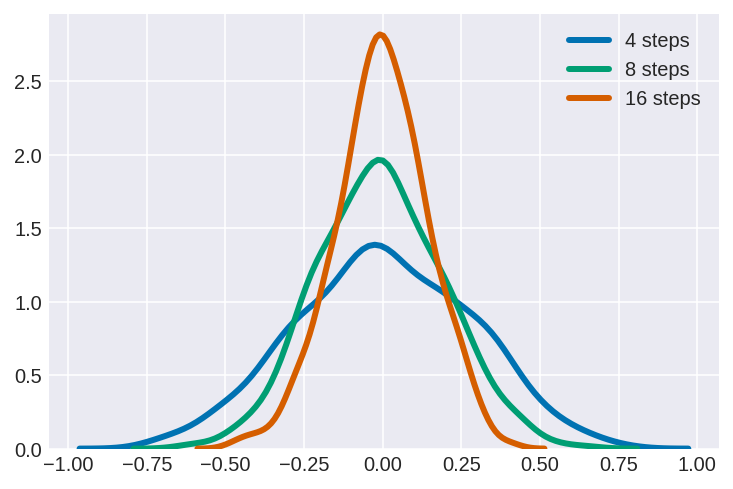

In [7]:
# List of 3 density plots
steps = ['4 steps', '8 steps', '16 steps']

# Iterate through the 3 steps
for idx, step in enumerate(steps):    
    # Draw the density plot
    sns.distplot(steps_mult[:,idx], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = steps[idx])

## Analysis on Howell Dataset

In [1]:
!pwd

/media/srivatsa/1f154f08-738e-4a84-8a6a-eec42155f3a0/projects/foss/statrethinking_winter2019/chapters


In [10]:
data = pd.read_csv('../../resources/Rethinking/Data/Howell1.csv', sep=';')

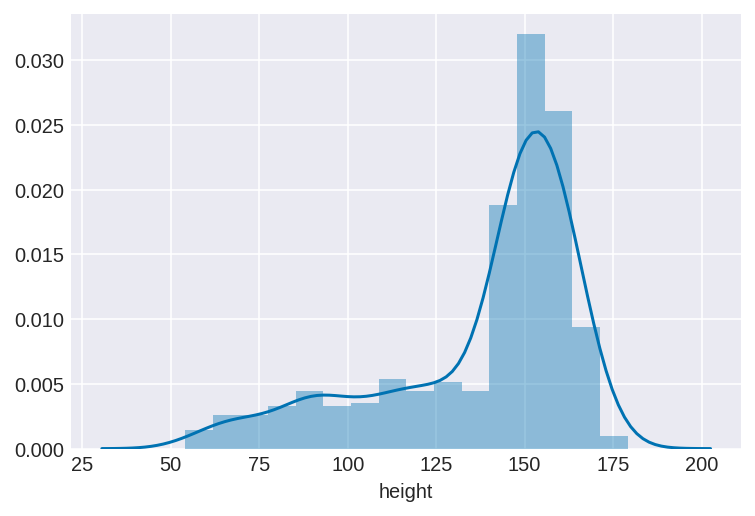

In [12]:
# Distribution of heights
sns.distplot(data.height)

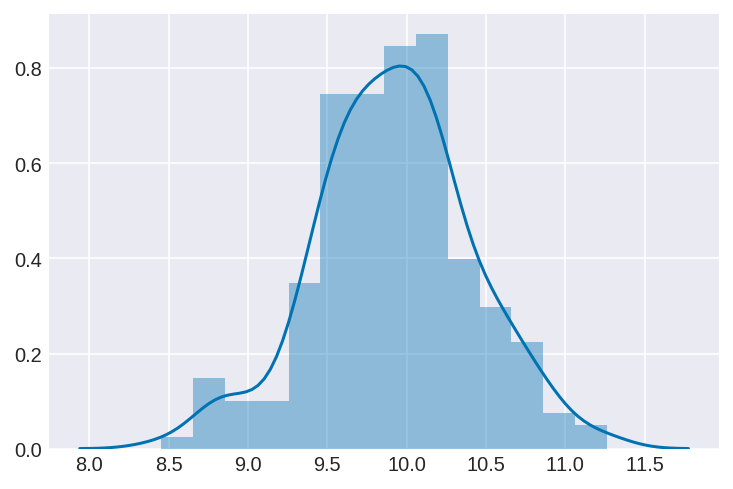

In [19]:
# Prior porbability distributions
p_heights = np.random.normal(178,20,200)
sns.distplot(p_heights)

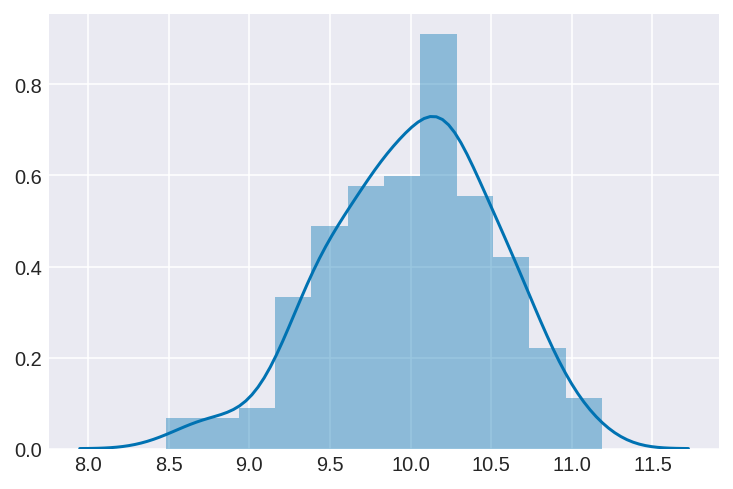

In [18]:
# Prior porbability distributions
p_heights = stats.norm.rvs(10,0.5,200)
sns.distplot(p_heights)

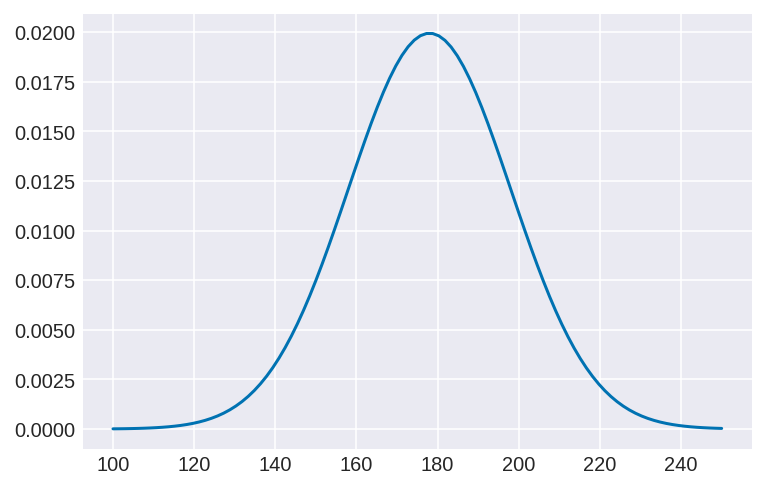

In [24]:
# Plotting density between 2 points to simulate sample mean
x = np.linspace(100,250,100)
plt.plot(x, stats.norm.pdf(x, 178,20));

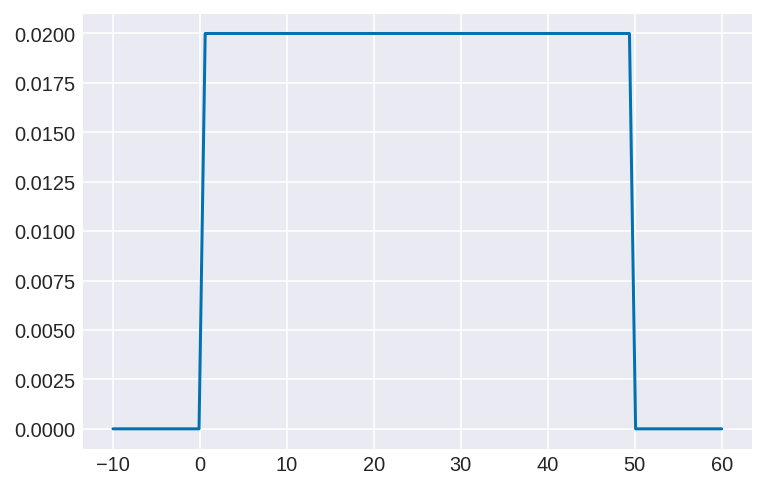

In [25]:
# Plotting density between 2 points to simulate sample standard deviation
x = np.linspace(-10,60,100)
plt.plot(x, stats.uniform.pdf(x, 0,50));

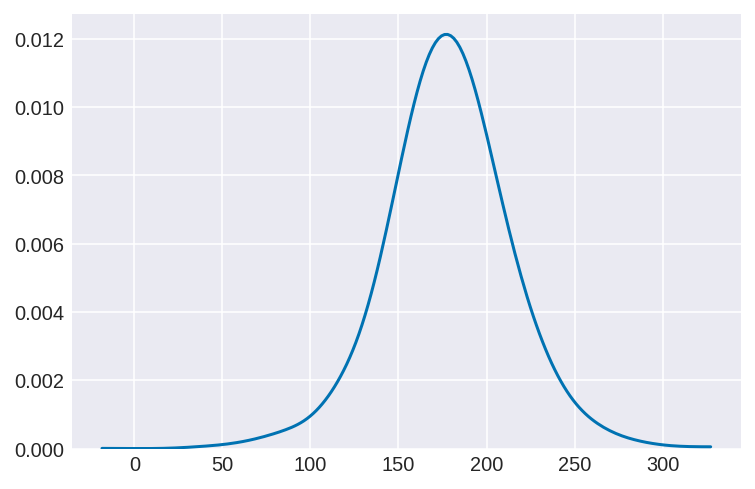

In [32]:
# Prior for heights given the prior for mean and standard deviation
n_samples = 5000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma, size=n_samples)

pm.kdeplot(prior_h);